In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import eigvals
import random
from itertools import combinations

In [2]:
def random_matrix(n):
    """
    Generate a random n by n matrix with entries from -1 to 1 and diagonals as 0.
    """
    # Generate a random n by n matrix with entries from -1 to 1
    mat = np.random.uniform(-1, 1, size=(n, n))
    A = (mat + mat.T)/2
    # Set the diagonal entries to 0
    np.fill_diagonal(A, 0)
    return A

def is_pos_def(A):
    """
    Check if a matrix is positive definite.
    """
    return np.all(np.linalg.eigvals(A) > 0)

def min_eig(A):
    """
    Compute the minimum eigenvalue of a matrix.
    """
    min_eig = np.min(eigvals(A))
    return min_eig.real

def generate_matrices(n, kappa):
    """
    Generate matrices.
    """
    G12 = random_matrix(n)
    G21 = G12.T
    weak_G12 = 0.5 * G12
    weak_G21 = weak_G12.T
    very_weak_G12 = 0.1 * weak_G12
    very_weak_G21 = very_weak_G12.T

    return G12, G21, weak_G12, weak_G21, very_weak_G12, very_weak_G21

def generate_G(G1, G2, G12, G21):
    """
    Generate the block matrix G.
    """
    G = np.block([[G1, G12], [G21, G2]])
    return G


In [3]:
n = 5
kappa = 0.5
iterations = 100000


eig_G1 = []
eig_G2 = []
eig_G = []
eig_G_weak = []
eig_G_very_weak = []
eig_oneway_G = []

pos_G1 = []
pos_G2 = []
pos_G = []
pos_G_weak = []
pos_G_very_weak = []
pos_oneway_G = []

for i in range(iterations):
    if len(eig_G) == 5000:
        break
    G1 = random_matrix(n)
    G2 = random_matrix(n)
    G12, G21, weak_G12, weak_G21, very_weak_G12, very_weak_G21 = generate_matrices(n, kappa)
    G = generate_G(G1, G2, G12, G21)
    G_weak = generate_G(G1, G2, weak_G12, weak_G21)
    G_very_weak = generate_G(G1, G2, very_weak_G12, very_weak_G21)
    oneway_G = np.block([[G1, G12], [(np.zeros((n, n))), G2]])

    min_G1 = min_eig(np.identity(n) + G1)
    if min_G1 < 0:
        continue
    min_G2 = min_eig(np.identity(n) + G2)
    min_G = min_eig(np.identity(2*n) + G)
    min_G_weak = min_eig(np.identity(2*n) + G_weak)
    min_G_very_weak = min_eig(np.identity(2*n) + G_very_weak)

    eig_G1.append(min_G1)
    eig_G2.append(min_G2)
    eig_G.append(min_G)
    eig_G_weak.append(min_G_weak)
    eig_G_very_weak.append(min_G_very_weak)
    eig_oneway_G.append(min_eig(np.identity(2*n) + oneway_G))

    pos_G1.append(is_pos_def(np.identity(n) + G1))
    pos_G2.append(is_pos_def(np.identity(n) + G2))
    pos_G.append(is_pos_def(np.identity(2*n) + G))
    pos_G_weak.append(is_pos_def(np.identity(2*n) + G_weak))
    pos_G_very_weak.append(is_pos_def(np.identity(2*n) + G_very_weak))
    pos_oneway_G.append(is_pos_def(np.identity(2*n) + oneway_G))
    

# Plotting the heatmap
data_1 = np.array([eig_G1, eig_G2, eig_oneway_G, eig_G_very_weak, eig_G_weak, eig_G])
data_2 = np.array([pos_G1, pos_G2, pos_oneway_G, pos_G_very_weak, pos_G_weak, pos_G])

# sort by the third row in eig_G and use the indices to also sort pos_G
sorted_data = data_1[:, np.argsort(data_1[0])]
sorted_data_2 = data_2[:, np.argsort(data_1[0])]

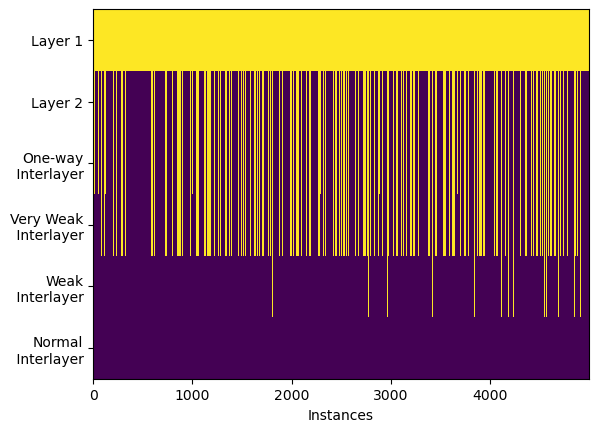

Total number of matrices:  5000


In [4]:
plt.imshow(sorted_data_2, cmap='viridis', interpolation='nearest', aspect='auto')

# Naming the y-ticks
plt.yticks(np.arange(6), ["Layer 1", "Layer 2", "One-way\n Interlayer", "Very Weak\n Interlayer", "Weak\n Interlayer", "Normal\n Interlayer"])

# plt.colorbar()
# plt.title('Determinants of Submatrices')
plt.xlabel('Instances')
# plt.ylabel('Matrices')
plt.savefig('test-prop9-binary.png', dpi=300, bbox_inches='tight')
plt.show()
print("Total number of matrices: ", len(eig_G))

In [21]:
def generate_and_sort_matrices(n, num_matrices):
    layer = []
    for _ in range(num_matrices):
        G = random_matrix(n)
        layer.append(G)

    # sort by the minimum eigenvalue
    sorted_layer = sorted(layer, key=lambda x: min_eig(np.identity(n) + x))

    return sorted_layer


In [41]:
n = 5
kappa = 0.5

sorted_layer_1 = generate_and_sort_matrices(n, 50)
sorted_layer_2 = generate_and_sort_matrices(n, 1000)

# Initialize lists to store data
eig_G1 = []
eig_G2 = []
eig_G = []
eig_G_weak = []
eig_G_very_weak = []
eig_oneway_G = []

pos_G1 = []
pos_G2 = []
pos_G = []
pos_G_weak = []
pos_G_very_weak = []
pos_oneway_G = []

for layer1_instance in sorted_layer_1:
    for layer2_instance in sorted_layer_2:
        G1 = layer1_instance
        G2 = layer2_instance
        G12, G21, weak_G12, weak_G21, very_weak_G12, very_weak_G21 = generate_matrices(n, kappa)
        G = generate_G(G1, G2, G12, G21)
        G_weak = generate_G(G1, G2, weak_G12, weak_G21)
        G_very_weak = generate_G(G1, G2, very_weak_G12, very_weak_G21)
        oneway_G = np.block([[G1, G12], [(np.zeros((n, n))), G2]])

        min_G1 = min_eig(np.identity(n) + G1)
        if min_G1 < 0:
            continue
        # print(min_G1)
        min_G2 = min_eig(np.identity(n) + G2)
        min_G = min_eig(np.identity(2*n) + G)
        min_G_weak = min_eig(np.identity(2*n) + G_weak)
        min_G_very_weak = min_eig(np.identity(2*n) + G_very_weak)

        eig_G1.append(min_G1)
        eig_G2.append(min_G2)
        eig_G.append(min_G)
        eig_G_weak.append(min_G_weak)
        eig_G_very_weak.append(min_G_very_weak)
        eig_oneway_G.append(min_eig(np.identity(2*n) + oneway_G))

        pos_G1.append(is_pos_def(np.identity(n) + G1))
        pos_G2.append(is_pos_def(np.identity(n) + G2))
        pos_G.append(is_pos_def(np.identity(2*n) + G))
        pos_G_weak.append(is_pos_def(np.identity(2*n) + G_weak))
        pos_G_very_weak.append(is_pos_def(np.identity(2*n) + G_very_weak))
        pos_oneway_G.append(is_pos_def(np.identity(2*n) + oneway_G))
    

# Plotting the heatmap
data_1 = np.array([eig_G1, eig_G2, eig_oneway_G, eig_G_very_weak, eig_G_weak, eig_G])
data_2 = np.array([pos_G1, pos_G2, pos_oneway_G, pos_G_very_weak, pos_G_weak, pos_G])

print(len(pos_G1))

18000


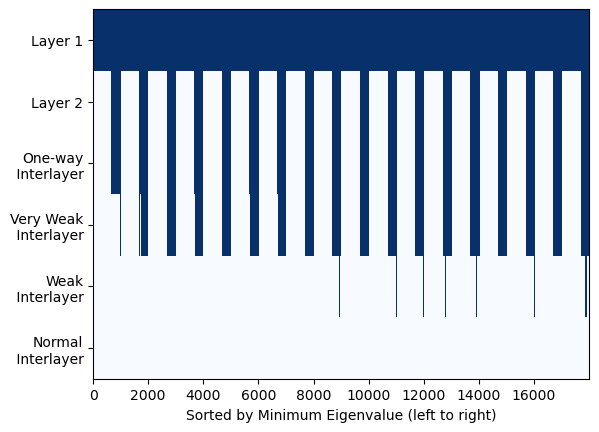

Total number of matrices:  18000


In [42]:
# Plotting the heatmap
data_1 = np.array([eig_G1, eig_G2, eig_oneway_G, eig_G_very_weak, eig_G_weak, eig_G])
data_2 = np.array([pos_G1, pos_G2, pos_oneway_G, pos_G_very_weak, pos_G_weak, pos_G])

plt.imshow(data_2, cmap='Blues', interpolation='nearest', aspect='auto')

# Naming the y-ticks
plt.yticks(np.arange(6), ["Layer 1", "Layer 2", "One-way\n Interlayer", "Very Weak\n Interlayer", "Weak\n Interlayer", "Normal\n Interlayer"])

# plt.colorbar()
# plt.title('Determinants of Submatrices')
plt.xlabel('Sorted by Minimum Eigenvalue (left to right)')
# do not show the xticks
# plt.ylabel('Matrices')
# plt.savefig('test-prop9-binary.png', dpi=300, bbox_inches='tight')
plt.show()
print("Total number of matrices: ", len(pos_G1))

In [46]:
import numpy as np

# Your defined columns to keep
columns_to_keep = list(range(0, 2000)) + list(range(12000, 15000)) + list(range(17000, 18000))

# Assuming data_2 is a NumPy array with a known number of columns
total_columns = data_2.shape[1]  # Get the total number of columns

# Create a list of all columns
all_columns = list(range(total_columns))

# Determine the columns to delete (all columns that are not in columns_to_keep)
columns_to_delete = [col for col in all_columns if col not in columns_to_keep]

# Use np.delete to remove the specified columns
data_2_modified = np.delete(data_2, columns_to_delete, axis=1)

In [47]:
# Use np.delete to remove the specified columns
data_1_modified = np.delete(data_1, columns_to_delete, axis=1)

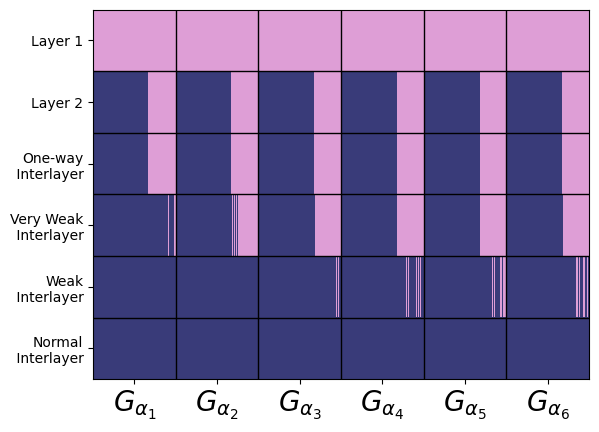

Total number of matrices:  18000


In [48]:
plt.imshow(data_2_modified, cmap='tab20b', interpolation='nearest', aspect='auto')

plt.rcParams.update({'font.size': 10})  # Sets the default font size to 16

# Naming the y-ticks
plt.yticks(np.arange(6), ["Layer 1", "Layer 2", "One-way\n Interlayer", "Very Weak\n Interlayer", "Weak\n Interlayer", "Normal\n Interlayer"])

# plt.colorbar()
# plt.title('Determinants of Submatrices')
# plt.xlabel('Sorted by Minimum Eigenvalue (left to right)')
# do not show the xticks
plt.xticks([500, 1500, 2500, 3500, 4500, 5500], [r'$G_{\alpha_1}$', r'$G_{\alpha_2}$', r'$G_{\alpha_3}$', r'$G_{\alpha_4}$', r'$G_{\alpha_5}$', r'$G_{\alpha_6}$'])
# increase the font size of xticks
plt.xticks(fontsize=20)
plt.axvline(x=1000, color='black', linewidth=1)
plt.axvline(x=2000, color='black', linewidth=1)
plt.axvline(x=3000, color='black', linewidth=1)
plt.axvline(x=4000, color='black', linewidth=1)
plt.axvline(x=5000, color='black', linewidth=1)
plt.axhline(y=0.5, color='black', linewidth=1)
plt.axhline(y=1.5, color='black', linewidth=1)
plt.axhline(y=2.5, color='black', linewidth=1)
plt.axhline(y=3.5, color='black', linewidth=1)
plt.axhline(y=4.5, color='black', linewidth=1)
# plt.ylabel('Matrices')
plt.savefig('test-prop9-binary.png', dpi=100, bbox_inches='tight')
plt.show()
print("Total number of matrices: ", len(pos_G1))